Задачи классификации с использованием нейросетей.

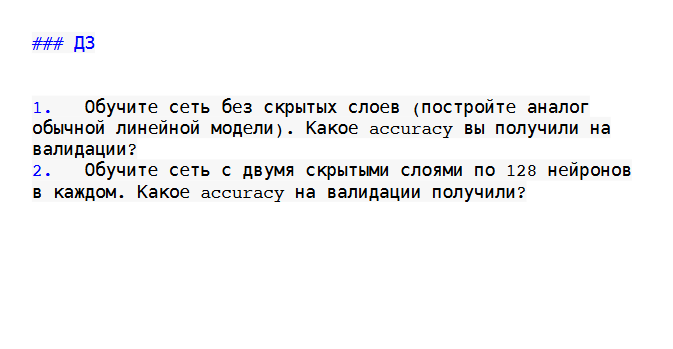

Импортируем бибилиотеки

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

Загружаем данные MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Нормализуем данные (приводим значения пикселей в диапазон [0, 1])

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

Преобразуем метки классов в категориальные (one-hot encoding)

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

1. Линейная модель без скрытых слоев

In [ ]:
model_linear = Sequential([
    Flatten(input_shape=(28, 28)),  # Преобразование 2D изображения в 1D вектор
    Dense(10, activation='softmax')  # Линейный слой с выходом для каждого класса
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Компилируем модель

In [ ]:
model_linear.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Обучаем модель

In [ ]:
model_linear.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7150 - loss: 1.1400 - val_accuracy: 0.8848 - val_loss: 0.4793
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8780 - loss: 0.4729 - val_accuracy: 0.8975 - val_loss: 0.3998
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8907 - loss: 0.4102 - val_accuracy: 0.9028 - val_loss: 0.3669
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8949 - loss: 0.3878 - val_accuracy: 0.9066 - val_loss: 0.3483
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8998 - loss: 0.3665 - val_accuracy: 0.9097 - val_loss: 0.3358


Оцениваем качество на валидационном наборе

In [ ]:
test_loss, test_accuracy_linear = model_linear.evaluate(x_test, y_test)
print(f"Accuracy линейной модели на валидации: {test_accuracy_linear:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8949 - loss: 0.3849
Accuracy линейной модели на валидации: 0.9097


Обученная модель имеет высокую точность, а именно - 91%.

2. Модель с двумя скрытыми слоями по 128 нейронов

In [ ]:
model_hidden = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),  # Первый скрытый слой с 128 нейронами и ReLU
    Dense(128, activation='relu'),  # Второй скрытый слой с 128 нейронами и ReLU
    Dense(10, activation='softmax') # Выходной слой с 10 нейронами (по числу классов)
])

Компилируем модель

In [ ]:
model_hidden.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Обучаем модель

In [ ]:
model_hidden.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8777 - loss: 0.4094 - val_accuracy: 0.9631 - val_loss: 0.1196
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9696 - loss: 0.0987 - val_accuracy: 0.9739 - val_loss: 0.0839
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9803 - loss: 0.0635 - val_accuracy: 0.9714 - val_loss: 0.0868
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9861 - loss: 0.0464 - val_accuracy: 0.9742 - val_loss: 0.0868
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9879 - loss: 0.0375 - val_accuracy: 0.9757 - val_loss: 0.0810


Оцениваем качество на валидационном наборе

In [ ]:
test_loss, test_accuracy_hidden = model_hidden.evaluate(x_test, y_test)
print(f"Accuracy модели с двумя скрытыми слоями на валидации: {test_accuracy_hidden:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9692 - loss: 0.1035
Accuracy модели с двумя скрытыми слоями на валидации: 0.9757


Обученная модель имеет точность 98%, что очень хорошо.